68


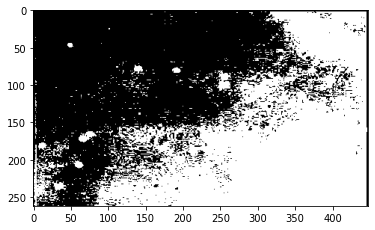

In [1]:
# Task1 - Otsu Thresholding
import numpy as np
import cv2
import matplotlib.pyplot as plt

def otsu(gray_img):
    row = gray_img.shape[0]
    col = gray_img.shape[1]
    threshold_t = 0
    max_g = 0 
    for t in range(255):
        lower_list = []
        up_list = []
        for i in gray_img:
            for j in i:
                if j < t:
                    lower_list.append(j)
                elif j >= t:
                    up_list.append(j)
        w0 = len(lower_list) / (row * col)
        w1 = len(up_list) / (row * col)
        sum_lower = 0
        sum_up = 0
        u0 = 0
        u1 = 0
        if len(lower_list) == 0:
             u0 = 0
        else:
            for i in lower_list:
                sum_lower += i
            u0 = sum_lower/len(lower_list)
        
        if len(up_list) == 0:
            u1 = 0
        else:
            for i in up_list:
                sum_up += i
            u1 = sum_up/len(up_list)
        
        g = w0 * w1 * (u0 - u1) ** 2
        # find the max the inter-class variance 
        if g > max_g:
            max_g = g
            threshold_t = t

    gray_img[gray_img < threshold_t] = 0
    gray_img[gray_img >= threshold_t] = 255
    return threshold_t,gray_img

# Algae.png Otsu
img = cv2.imread("Algae.png", cv2.IMREAD_GRAYSCALE)
print(otsu(img)[0]) #68
plt.imshow(otsu(img)[1],'gray', vmin=0, vmax=255)


116


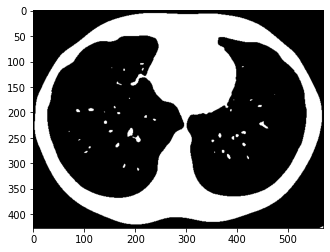

In [80]:
# CT.png Otsu
img = cv2.imread("CT.png", cv2.IMREAD_GRAYSCALE)
print(otsu(img)[0]) #116
plt.imshow(otsu(img)[1],'gray', vmin=0, vmax=255)

79


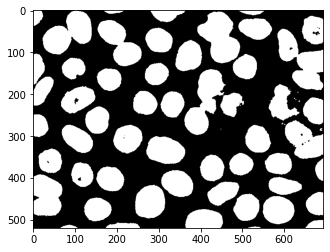

In [7]:
# Nuclei.png Otsu
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)
print(otsu(img)[0]) #79
plt.imshow(otsu(img)[1],'gray', vmin=0, vmax=255)


174


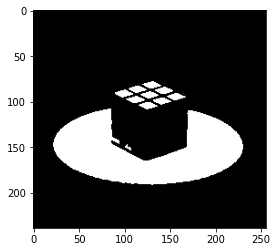

In [9]:
# Rubik.png Otsu
img = cv2.imread("Rubik.png", cv2.IMREAD_GRAYSCALE)
print(otsu(img)[0]) #174
plt.imshow(otsu(img)[1],'gray', vmin=0, vmax=255)


127


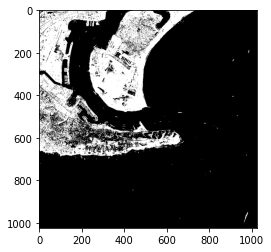

In [11]:
# Satellite.png Otsu
img = cv2.imread("Satellite.png", cv2.IMREAD_GRAYSCALE)
print(otsu(img)[0]) #68
plt.imshow(otsu(img)[1],'gray', vmin=0, vmax=255)


64


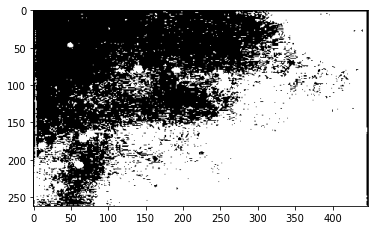

In [2]:
# Task2 - Isodata Thresholding
import cv2
import matplotlib.pyplot as plt

def isodata(gray_img, initial):
    initial_t = initial
    lower_list = []
    up_list = []
    while True:
        for i in gray_img:
            for j in i:
                if j < initial_t:
                    lower_list.append(j)
                elif j >= initial_t:
                    up_list.append(j)
        sum_lower = 0
        sum_up = 0
        u0 = 0
        u1 = 0
        if len(lower_list) == 0:
            u0 = 0
        else:
            for i in lower_list:
                sum_lower += i
            u0 = sum_lower/len(lower_list)
            
        if len(up_list) == 0:
            u1 = 0
        else:
            for i in up_list:
                sum_up += i
            u1 = sum_up/len(up_list)
        iso_t = (u0 + u1)/2
        if round(iso_t) == initial_t:
            gray_img[gray_img < round(iso_t)] = 0
            gray_img[gray_img >= round(iso_t)] = 255
            return round(iso_t), gray_img
        else:
            initial_t = round(iso_t)
# Algae.png Isodata
img = cv2.imread("Algae.png", cv2.IMREAD_GRAYSCALE)
print(isodata(img,60)[0])
plt.imshow(isodata(img,60)[1],'gray', vmin=0, vmax=255)


114


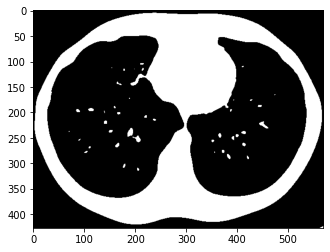

In [19]:
# CT.png Isodata
img = cv2.imread("CT.png", cv2.IMREAD_GRAYSCALE)
print(isodata(img,74)[0])
plt.imshow(isodata(img,74)[1],'gray', vmin=0, vmax=255)

80


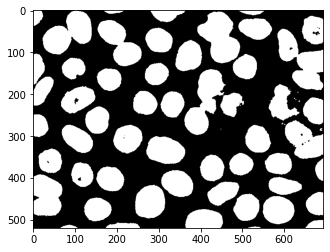

In [22]:
# Nuclei.png Isodata
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)
print(isodata(img,89)[0])
plt.imshow(isodata(img,89)[1],'gray', vmin=0, vmax=255)

172


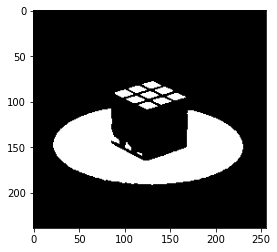

In [23]:
# Rubik.png Isodata
img = cv2.imread("Rubik.png", cv2.IMREAD_GRAYSCALE)
print(isodata(img,159)[0])
plt.imshow(isodata(img,159)[1],'gray', vmin=0, vmax=255)

100


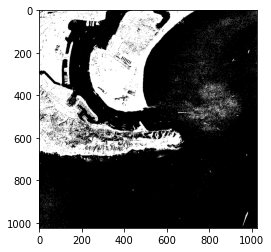

In [3]:
# Satellite.png Isodata
img = cv2.imread("Satellite.png", cv2.IMREAD_GRAYSCALE)
print(isodata(img,34)[0])
plt.imshow(isodata(img,34)[1],'gray', vmin=0, vmax=255)


97


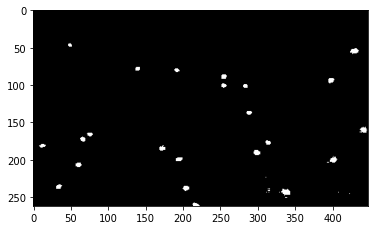

In [3]:
# Task3 - Triangle Thresholding
# coding:utf8

import numpy as np
import cv2
from matplotlib import pyplot as plt

def Triangle(Histo):
    tri_list = []
    index = 0
    for i in Histo:
        if i > 0:
            tri_list.append(index)
        index += 1
  
    Min = tri_list[0]
    Max = tri_list[-1]
    HistGramOut = np.array(Histo)
    invert = False

    left_bound = Min
    right_bound = Max

    max_peak = 0
    for i in Histo:
        if i > max_peak:
            max_peak = i
    index_peak = 0
    while True:
        if Histo[index_peak] == max_peak:
            break
        index_peak += 1

    if  right_bound - index_peak > index_peak - left_bound :
        HistGramOut = HistGramOut[::-1] 
        left_bound = 255 - right_bound
        index_peak = 255 - index_peak
        invert = True

    threshold = left_bound
    dist = 0
    for i in range(left_bound + 1, index_peak + 1):
        tempdist = max_peak * i + (left_bound - index_peak) * HistGramOut[i] 
        if tempdist > dist:
            dist = tempdist
            threshold = i

    threshold -= 1
    if invert:
        threshold = 255 -  threshold
    return threshold

def transfor(image):
    # histogram
    grayHist = np.zeros(256)
    for v in range(256):
        sum = 0
        for i in image:
            for j in i:
                if j == v:
                    sum += 1
        grayHist[v] = sum
    threshold = Triangle(grayHist)
    image[image > threshold] = 255

    image[image <= threshold] = 0
    return threshold, image
# Algae - Triangle
img = cv2.imread("Algae.png", cv2.IMREAD_GRAYSCALE)
print(transfor(img)[0])
plt.imshow(transfor(img)[1], 'gray', vmin=0, vmax=255)



47


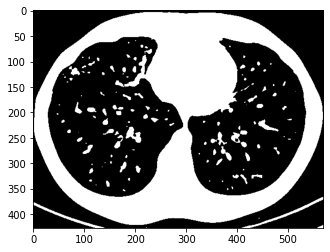

In [4]:
# CT - Triangle
img = cv2.imread("CT.png", cv2.IMREAD_GRAYSCALE)
print(transfor(img)[0])
plt.imshow(transfor(img)[1], 'gray', vmin=0, vmax=255)

2


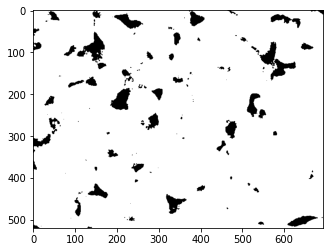

In [5]:
# Nuclei - Triangle
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)
print(transfor(img)[0])
plt.imshow(transfor(img)[1], 'gray', vmin=0, vmax=255)

250


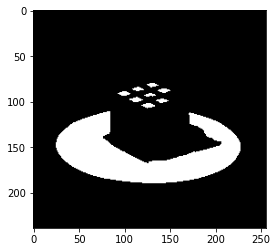

In [13]:
# Rubik - Triangle
img = cv2.imread("Rubik.png", cv2.IMREAD_GRAYSCALE)
print(transfor(img)[0])
plt.imshow(transfor(img)[1], 'gray', vmin=0, vmax=255)

72


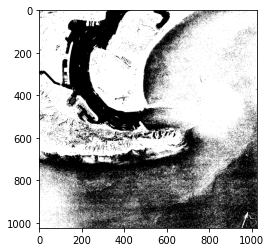

In [7]:
# Satellite - Triangle
img = cv2.imread("Satellite.png", cv2.IMREAD_GRAYSCALE)
print(transfor(img)[0])
plt.imshow(transfor(img)[1], 'gray', vmin=0, vmax=255)

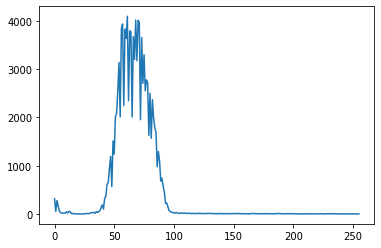

In [14]:
# Task4 histogram
# Algae
img = cv2.imread("Algae.png", cv2.IMREAD_GRAYSCALE)
histb=cv2.calcHist([img ],[0],None,[256],[0,255])
plt.plot (histb)


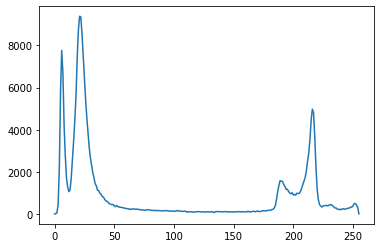

In [15]:
# CT
img = cv2.imread("CT.png", cv2.IMREAD_GRAYSCALE)
histb=cv2.calcHist([img ],[0],None,[256],[0,255])
plt.plot (histb)

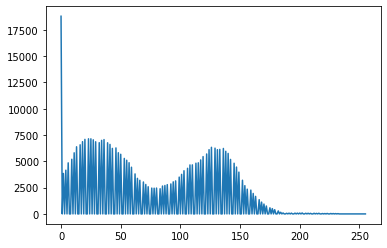

In [16]:
# Nuclei
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)
histb=cv2.calcHist([img ],[0],None,[256],[0,255])
plt.plot (histb)

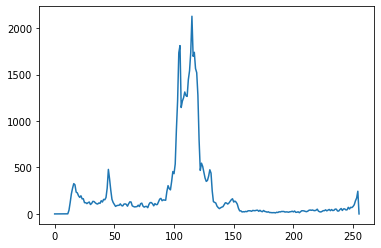

In [17]:
# Rubik
img = cv2.imread("Rubik.png", cv2.IMREAD_GRAYSCALE)
histb=cv2.calcHist([img ],[0],None,[256],[0,255])
plt.plot (histb)

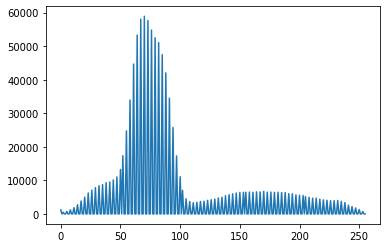

In [18]:
# Satellite
img = cv2.imread("Satellite.png", cv2.IMREAD_GRAYSCALE)
histb=cv2.calcHist([img ],[0],None,[256],[0,255])
plt.plot (histb)